In [1]:
import numpy as np
import matplotlib.pyplot as plt

Interview question: _Toss a coin till two consecutive heads or tails are shown. $\mathbb P(H)=p$. $\mathbb P(HH)=?$_

This is a Markov chain with states $TT$, $T$, $H$, $HH$, with $TT$ and $HH$ absorbing states. Set $P_{TT}=0$, $P_{HH}=1$, solve the arising system:

\begin{align*}
P_H & = p     P_{HH} + (1-p) P_{T} = p + (1-p) P_{T}\\
P_T & = (1-p) P_{TT} + p     P_{H} = p P_{H}\\
\Rightarrow P_H&=p+(1-p)p P_{H}=\frac p{p^2 - p + 1}, P_T=\frac {p^2}{p^2 - p + 1}.
\end{align*}

Recall that $P_H=\mathbb P(HH|H)$, $P_T=\mathbb P(HH|T)$, so 
$$\mathbb P(HH)=\mathbb P(HH|H)\mathbb P(H)+\mathbb P(HH|T)\mathbb P(T)=p\frac p{p^2 - p + 1}+(1-p)\frac {p^2}{p^2 - p + 1}=
\frac{2p^2-p^3}{p^2 - p + 1}.$$

The next cell computes $\mathbb P(HH)$:

In [2]:
p = 0.75
n_games = 100000

wins = 0
for game in range(n_games):
    flip = np.random.uniform()
    if flip < p:
        H = 1
    else:
        H = 0
    while H != -1 and H != 2:
        flip = np.random.uniform()
        if  flip < p:
            H += 1
        else:
            H -= 1
    if H == 2:
        wins += 1

print(wins/n_games,(2*p**2-p**3)/(p**2-p+1))

0.86629 0.8653846153846154


while this one computes $P_T$.

In [3]:
p = 0.584
n_games = 100000

wins = 0
for game in range(n_games):

    H = 0
    while H != -1 and H != 2:
        flip = np.random.uniform()
        if  flip < p:
            H += 1
        else:
            H -= 1
    if H == 2:
        wins += 1

print(wins/n_games,p**2/(p**2-p+1))

0.45258 0.450503001098994


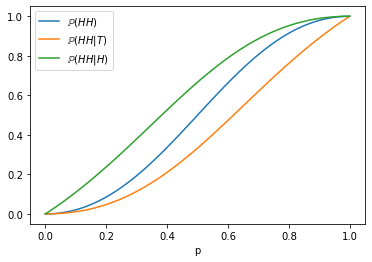

In [4]:
p = np.linspace(0,1,100)
plt.plot(p,(2*p**2-p**3)/(p**2-p+1), label=r'$\mathbb{P}(HH)$')
plt.plot(p,p**2/(p**2-p+1), label=r'$\mathbb{P}(HH|T)$')
plt.plot(p,p/(p**2-p+1), label=r'$\mathbb{P}(HH|H)$')
plt.xlabel('p')
plt.legend()
plt.show()

Approach by symmetry: at any moment, every game is a sequence like $HTHTHTHT\dots$ or $THTHTHTH\dots$, so for every game there exists a perfectly symmetrical one.

A game can start and end with the same face like $HTHT\dots THH$, so it would have an even number of games, with in example $k+2$ heads and $k$ tails, or the other way around.

If it has an odd number of flips, they must necessarily be like $THT .. THH$, so $k$ tails and $k+1$ heads.

So:

$$\mathbb P(HH)=p^2\sum_{k=0}^{\infty}\left(p(1-p)\right)^k+p\sum_{k=1}^{\infty}\left((1-p)p\right)^k=(p^2+p)\sum_{k=0}^{\infty}\left((1-p)p\right)^k-p=\frac{p^2+p-p(1-p+p^2)}{1-p+p^2}=\frac{2p^2-p^3}{p^2 - p + 1}.$$